# Linear Regression

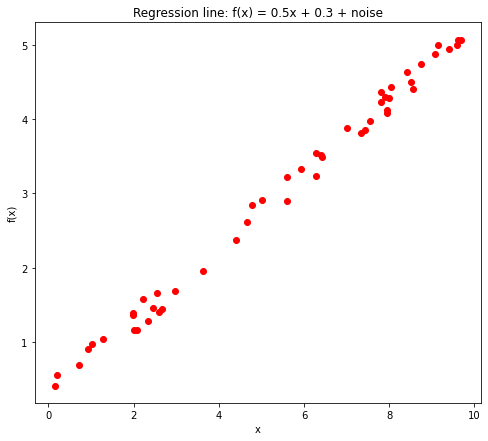

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random

xs = []; ys = []

for idx in range(50):
  x = random.uniform(0, 10); y = x * 0.5 + 0.3 + random.uniform(-0.2, 0.2)
  xs.append(x); ys.append(y)

data = np.array(xs, dtype=np.float32)
ground_truth = np.array(ys, dtype=np.float32)

plt.rcParams["figure.figsize"] = (8, 7)
plt.plot(xs, ys, 'ro')
plt.title(f'Regression line: f(x) = 0.5x + 0.3 + noise')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.show()

In [17]:
import torch
import torch.nn as nn
from torch.optim import optimizer

data = torch.from_numpy(data).unsqueeze(1)
ground_truth = torch.from_numpy(ground_truth).unsqueeze(1)
print(f'Shape of data: {data.shape}')
print(f'Shape of ground truth: {ground_truth.shape}')

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.learner = nn.Linear(input_dim, output_dim)
    nn.init.zeros_(self.learner.weight); nn.init.zeros_(self.learner.bias)
  def forward(self, x):
    return self.learner(x)
  def get_params(self):
    return self.learner.weight.detach().numpy()[0][0], self.learner.bias.detach().numpy()[0]

Shape of data: torch.Size([50, 1])
Shape of ground truth: torch.Size([50, 1])


Epoch: 1, Loss =  557.3055, Model parameters = [w: 1.0291023254394531, b: 0.1497105360031128]


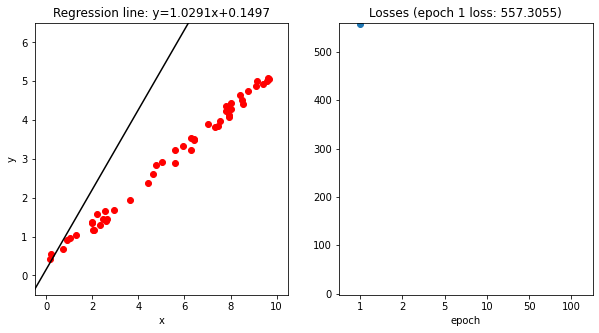

Epoch: 2, Loss =  498.2793, Model parameters = [w: 0.05540129169821739, b: 0.013443637639284134]


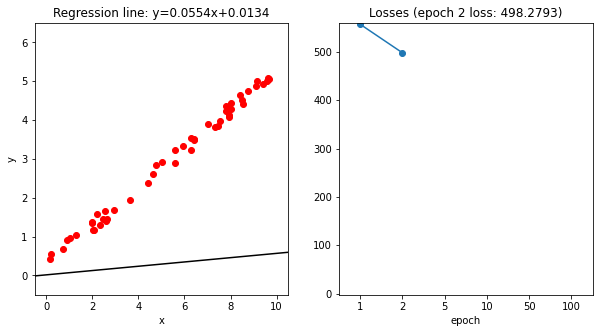

Epoch: 5, Loss =  356.1994, Model parameters = [w: 0.9270060062408447, b: 0.1459522396326065]


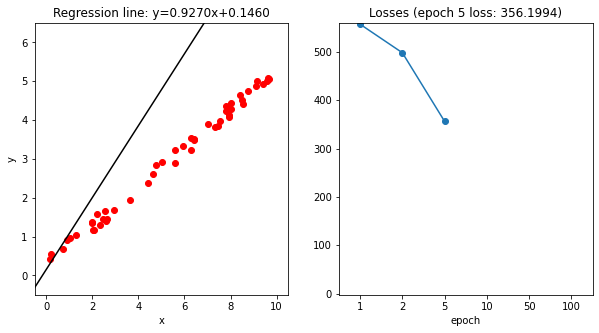

Epoch: 10, Loss =  203.7523, Model parameters = [w: 0.22354571521282196, b: 0.05836278200149536]


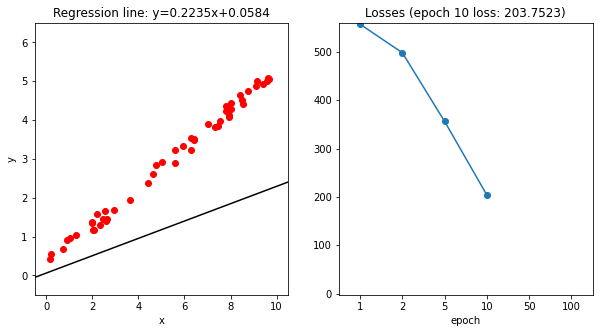

Epoch: 50, Loss =  3.2347, Model parameters = [w: 0.48226842284202576, b: 0.17544777691364288]


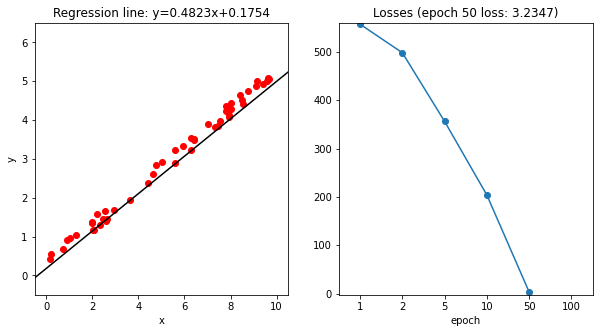

Epoch: 100, Loss =  0.8204, Model parameters = [w: 0.5039114952087402, b: 0.23873326182365417]


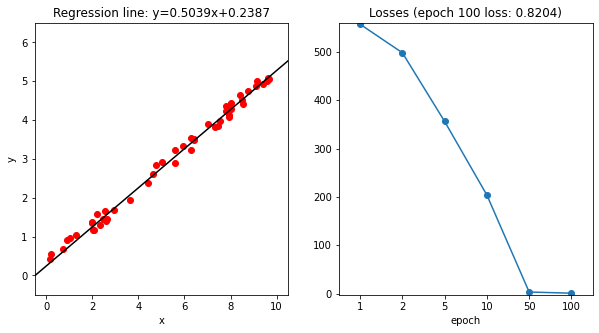

In [18]:
model = LinearRegression(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=5e-4)
weights = []; biases = []; losses = []
max_loss = -1

epochs = 100
xt = [1, 2, 5, 10, 50, epochs]
for epoch in range(epochs):
  loss = 0
  for idx in range(len(data)):
    pred = model(data[idx])
    loss += criterion(pred, ground_truth[idx])
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if epoch+1 in xt:
    w, b = model.get_params()
    weights.append(w); biases.append(b); losses.append(loss.detach().numpy())
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.plot(xs, ys, 'ro')
    mx = [-2, 12]
    my = [mx[0]*w+b, mx[1]*w+b]
    ax1.plot(mx, my, 'k-')
    ax1.set_xlim([-0.5, 10.5]); ax1.set_ylim([-0.5, 6.5])
    ax1.set_xlabel('x'); ax1.set_ylabel('y')
    if b < 0:
      ax1.set_title(f'Regression line: y={"{0:.4f}".format(w)}x{"{0:.4f}".format(b)}')
    else:
      ax1.set_title(f'Regression line: y={"{0:.4f}".format(w)}x+{"{0:.4f}".format(b)}')
    
    if max_loss == -1:
      max_loss = loss.detach().numpy()
    ax2.plot(range(1, len(losses)+1), losses, '-o')
    plt.xticks(range(1, 7), xt)
    ax2.set_xlim([0.5, 6.5]); ax2.set_ylim([-2.5, max_loss+2.5])
    ax2.set_title(f'Losses (epoch {epoch+1} loss: {"{0:.4f}".format(loss)})')
    ax2.set_xlabel('epoch')
    print(f'Epoch: {epoch+1}, Loss = {loss.item(): .4f}, Model parameters = [w: {w}, b: {b}]')
    plt.show()

# Binary Classification

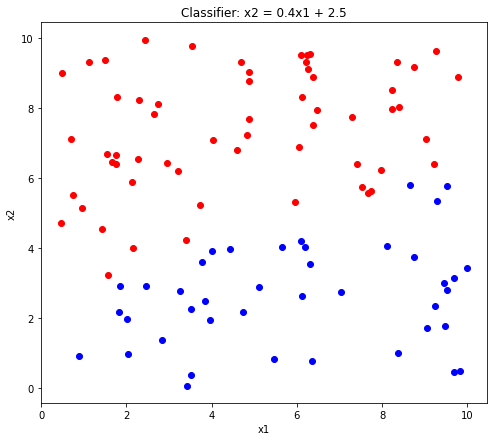

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random

x1s = []; x2s = []; ys = []
ax1s = []; ax2s = [] # (x1, x2) in class a, labeled as 0
bx1s = []; bx2s = [] # (x1, x2) in class b, labeled as 1

for idx in range(100):
  x1 = random.uniform(0, 10); x2 = random.uniform(0, 10)
  x1s.append(x1); x2s.append(x2)
  if x1 * 0.4 + 2.5 - x2 < 0:
    ax1s.append(x1); ax2s.append(x2)
    ys.append(0)
  else:
    bx1s.append(x1); bx2s.append(x2)
    ys.append(1)

data = np.dstack((np.array(x1s, dtype=np.float32), np.array(x2s, dtype=np.float32)))
ground_truth = np.array(ys, dtype=np.float32)

plt.rcParams["figure.figsize"] = (8, 7)
plt.plot(ax1s, ax2s, 'ro')
plt.plot(bx1s, bx2s, 'bo')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Classifier: x2 = 0.4x1 + 2.5')
plt.show()

In [27]:
import torch
import torch.nn as nn
from torch.optim import optimizer

data = torch.from_numpy(data).permute(1, 2, 0).squeeze(-1)
ground_truth = torch.from_numpy(ground_truth).unsqueeze(1)
print(f'Shape of data: {data.shape}')
print(f'Shape of ground truth: {ground_truth.shape}')

class BinaryClassification(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(BinaryClassification, self).__init__()
    self.learner = nn.Linear(input_dim, output_dim)
    nn.init.zeros_(self.learner.weight); nn.init.zeros_(self.learner.bias)
  def forward(self, x):
    return torch.sigmoid(self.learner(x))
  def get_params(self):
    return self.learner.weight.detach().numpy()[0][0], self.learner.weight.detach().numpy()[0][1], self.learner.bias.detach().numpy()[0]

Shape of data: torch.Size([100, 2])
Shape of ground truth: torch.Size([100, 1])


Epoch: 1, Loss =  69.3147, Model parameters = [w: -0.09658921509981155, b: -0.05484004691243172]


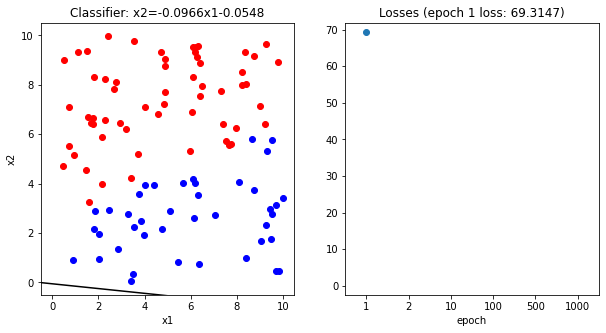

Epoch: 2, Loss =  61.7544, Model parameters = [w: 1.348268985748291, b: 0.14706718921661377]


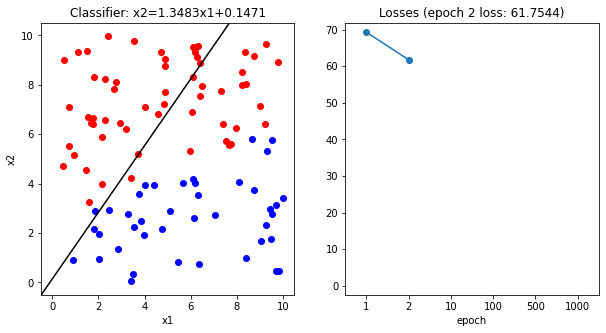

Epoch: 10, Loss =  26.4991, Model parameters = [w: 0.7205600738525391, b: 0.15735086798667908]


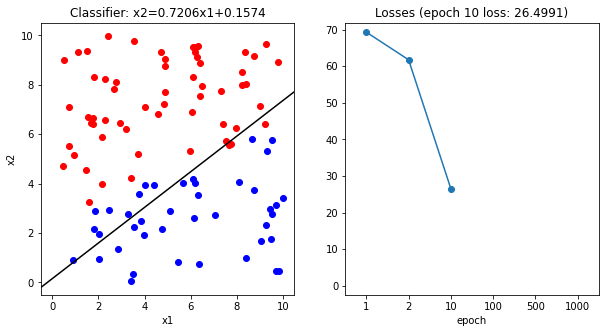

Epoch: 100, Loss =  18.2476, Model parameters = [w: 0.6547644138336182, b: 0.7215263247489929]


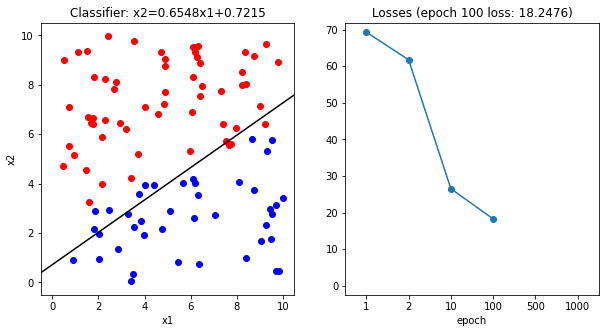

Epoch: 500, Loss =  11.3793, Model parameters = [w: 0.49684953689575195, b: 1.762488603591919]


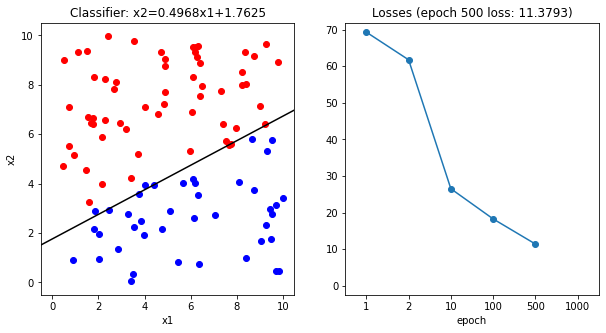

Epoch: 1000, Loss =  8.8270, Model parameters = [w: 0.4434157609939575, b: 2.108513832092285]


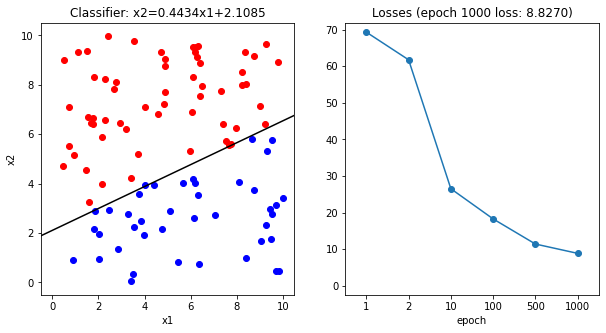

In [28]:
model = BinaryClassification(2, 1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=2e-3)
weights = []; biases = []; losses = []
max_loss = -1

epochs = 1000
xt = [1, 2, 10, 100, 500, epochs]
for epoch in range(epochs):
  loss = 0
  for idx in range(len(data)):
    pred = model(data[idx])
    loss += criterion(pred, ground_truth[idx])
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if epoch+1 in xt:
    w1, w2, b = model.get_params()
    w = -w1/w2; b = -b/w2
    weights.append(w); biases.append(b); losses.append(loss.detach().numpy())
    f, (sub1, sub2) = plt.subplots(1, 2, figsize=(10, 5))
    sub1.plot(ax1s, ax2s, 'ro')
    sub1.plot(bx1s, bx2s, 'bo')
    mx1 = [-2, 12]
    mx2 = [mx1[0]*w+b, mx1[1]*w+b]
    sub1.plot(mx1, mx2, 'k-')
    sub1.set_xlim([-0.5, 10.5]); sub1.set_ylim([-0.5, 10.5])
    sub1.set_xlabel('x1'); sub1.set_ylabel('x2')
    if b < 0:
      sub1.set_title(f'Classifier: x2={"{0:.4f}".format(w)}x1{"{0:.4f}".format(b)}')
    else:
      sub1.set_title(f'Classifier: x2={"{0:.4f}".format(w)}x1+{"{0:.4f}".format(b)}')
    
    if max_loss == -1:
      max_loss = loss.detach().numpy()
    sub2.plot(range(1, len(losses)+1), losses, '-o')
    plt.xticks(range(1, 7), xt)
    sub2.set_xlim([0.5, 6.5]); sub2.set_ylim([-2.5, max_loss+2.5])
    sub2.set_title(f'Losses (epoch {epoch+1} loss: {"{0:.4f}".format(loss)})')
    sub2.set_xlabel('epoch')
    print(f'Epoch: {epoch+1}, Loss = {loss.item(): .4f}, Model parameters = [w: {w}, b: {b}]')
    plt.show()